In [2]:
! pip install pandas_profiling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.express as px
import seaborn as sns
import pandas as pd
#import researchpy as rp
import plotly.io as pio
import scipy.stats as st
from statsmodels.formula.api import ols
from collections import *
import ast
from datetime import date, timedelta, datetime
import tkinter
import matplotlib
%matplotlib inline
from pandas_profiling import ProfileReport
pio.renderers.default = "colab"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.1.2-py2.py3-none-any.whl (345 kB)
  Using cached matplotlib-3.6.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)
  Using cached phik-0.12.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (679 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


<ipython-input-2-18f1a651a623>:19: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## Data Preprocessing and ADA

In [4]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/My Drive/listings.csv"
df = pd.read_csv(path) 
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20221221170255,2022-12-21,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.26
1,5506,https://www.airbnb.com/rooms/5506,20221221170255,2022-12-21,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,...,4.88,4.53,4.74,Approved by the government,f,10,10,0,0,0.70
2,6695,https://www.airbnb.com/rooms/6695,20221221170255,2022-12-21,previous scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,...,4.96,4.50,4.72,STR446650,f,10,10,0,0,0.76
3,2014651,https://www.airbnb.com/rooms/2014651,20221221170255,2022-12-21,city scrape,One Private Bedroom in J.P.,Private bedroom on third floor of three family...,From the Boston Globe;<br /><br />JAMAICA PLAI...,https://a0.muscache.com/pictures/27672761/5e98...,2155838,...,4.86,4.56,4.36,NaN,f,1,0,1,0,0.35
4,2014882,https://www.airbnb.com/rooms/2014882,20221221170255,2022-12-21,city scrape,1 bedroom and private bathroom,A country feel in Brighton center. Upstairs tw...,This is a quiet suburban neighborhood which is...,https://a0.muscache.com/pictures/394bce4a-68fa...,1521296,...,4.80,4.72,4.71,STR-415415,t,2,0,2,0,2.69


In [5]:
collection_dt=datetime.strptime('2022-12-22',"%Y-%m-%d")

In [6]:
df1=df.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'source','picture_url','host_url','host_thumbnail_url'
         , 'host_picture_url','minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights','neighbourhood',
       'neighbourhood_group_cleansed','maximum_maximum_nights', 'minimum_nights_avg_ntm','calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms','host_listings_count','beds',
       'host_total_listings_count','host_location','host_neighbourhood','bathrooms', 'bathrooms_text',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability','license','host_verifications',
        'number_of_reviews_ltm','number_of_reviews_l30d','calendar_last_scraped', 'availability_30','availability_60', 'availability_90'
        ,'description', 'neighborhood_overview', 'host_id', 'host_name', 'host_about','name','latitude', 'longitude','first_review','last_review'
        ,'reviews_per_month','id', 'property_type',
       'host_response_time', 'minimum_nights', 'maximum_nights', 'host_has_profile_pic','calculated_host_listings_count','host_response_rate'])
df1=df1.rename(columns={'neighbourhood_cleansed':'neighbourhood'})
df1.columns

Index(['host_since', 'host_acceptance_rate', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood', 'room_type', 'accommodates',
       'bedrooms', 'amenities', 'price', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [7]:
df1['amenities']=[ast.literal_eval(a) for a in df1['amenities']]
df1['has_wifi']=['Wifi' in a for a in df1['amenities']]
df1['has_Dryer']=['Dryer' in a for a in df1['amenities']]
df1['has_Washer']=['Washer' in a for a in df1['amenities']]
df1['has_Free_parking']=['Free street parking' in a for a in df1['amenities']]or['Free parking on premises' in a for a in df1['amenities']]
df1=df1.drop(columns=['amenities'])

In [8]:
df1.columns

Index(['host_since', 'host_acceptance_rate', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood', 'room_type', 'accommodates',
       'bedrooms', 'price', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'has_wifi', 'has_Dryer',
       'has_Washer', 'has_Free_parking'],
      dtype='object')

In [9]:
df1['host_since'] = pd.to_datetime(df1['host_since'], format="%Y-%m-%d")
df1['days_since_registration']=df1['host_since'].apply(lambda x: (collection_dt-x).days)
df1 = df1.drop(columns='host_since')
df1['host_acceptance_rate']=df1['host_acceptance_rate'].str.rstrip("%").astype('float')/100
dict_neighbourhoods={}
i=1
for a in list(Counter(df1['neighbourhood'])):
    dict_neighbourhoods[a]=str(i)
    i+=1
dict_room_type={}
i=1
for a in list(Counter(df1['room_type'])):
    dict_room_type[a]=str(i)
    i+=1
df1.neighbourhood=df1.neighbourhood.map(dict_neighbourhoods)
df1.room_type=df1.room_type.map(dict_room_type)
true_false={'t':True,'f':False}
df1.host_is_superhost =df1.host_is_superhost.map(true_false).fillna(False)
df1.host_identity_verified=df1.host_identity_verified.map(true_false)
df1.instant_bookable=df1.instant_bookable.map(true_false)
df1.price =df1.price.apply(lambda x: float(x.replace('$','').replace(',','')))
for c in df1.columns:
    if df1[c].dtype=='bool':
        df1[c]=df1[c].map({True:1,False:0})

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         3221 non-null   float64
 1   host_is_superhost            3703 non-null   int64  
 2   host_identity_verified       3703 non-null   int64  
 3   neighbourhood                3703 non-null   object 
 4   room_type                    3703 non-null   object 
 5   accommodates                 3703 non-null   int64  
 6   bedrooms                     3240 non-null   float64
 7   price                        3703 non-null   float64
 8   availability_365             3703 non-null   int64  
 9   number_of_reviews            3703 non-null   int64  
 10  review_scores_rating         2692 non-null   float64
 11  review_scores_accuracy       2684 non-null   float64
 12  review_scores_cleanliness    2685 non-null   float64
 13  review_scores_chec

In [11]:
df1 = df1.dropna().reset_index(drop=True)
df1.shape

(2049, 23)

In [12]:
df1.head()

,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,room_type,accommodates,bedrooms,price,availability_365,number_of_reviews,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,has_wifi,has_Dryer,has_Washer,has_Free_parking,days_since_registration
0,0.19,1,0,1,1,2,1.0,132.0,135,24,...,5.00,4.96,4.88,4.92,0,1,1,1,1,5132
1,1.00,1,1,2,1,2,1.0,99.0,5,118,...,4.95,4.88,4.53,4.74,0,1,1,1,1,5054
2,1.00,0,1,4,2,2,1.0,75.0,194,279,...,4.89,4.80,4.72,4.71,1,1,0,0,1,4020
3,0.29,0,1,5,1,6,2.0,552.0,128,9,...,5.00,5.00,4.89,4.44,0,1,1,1,1,3317
4,0.29,0,1,5,2,3,1.0,220.0,313,86,...,4.96,4.99,4.79,4.73,0,1,1,1,1,3317


In [13]:
df1.columns

Index(['host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood', 'room_type', 'accommodates', 'bedrooms', 'price',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'has_wifi', 'has_Dryer', 'has_Washer', 'has_Free_parking',
       'days_since_registration'],
      dtype='object')

In [14]:
df_profile=ProfileReport(df1,title='DF',minimal=True)
df_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-16-b3901e0c98d3>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



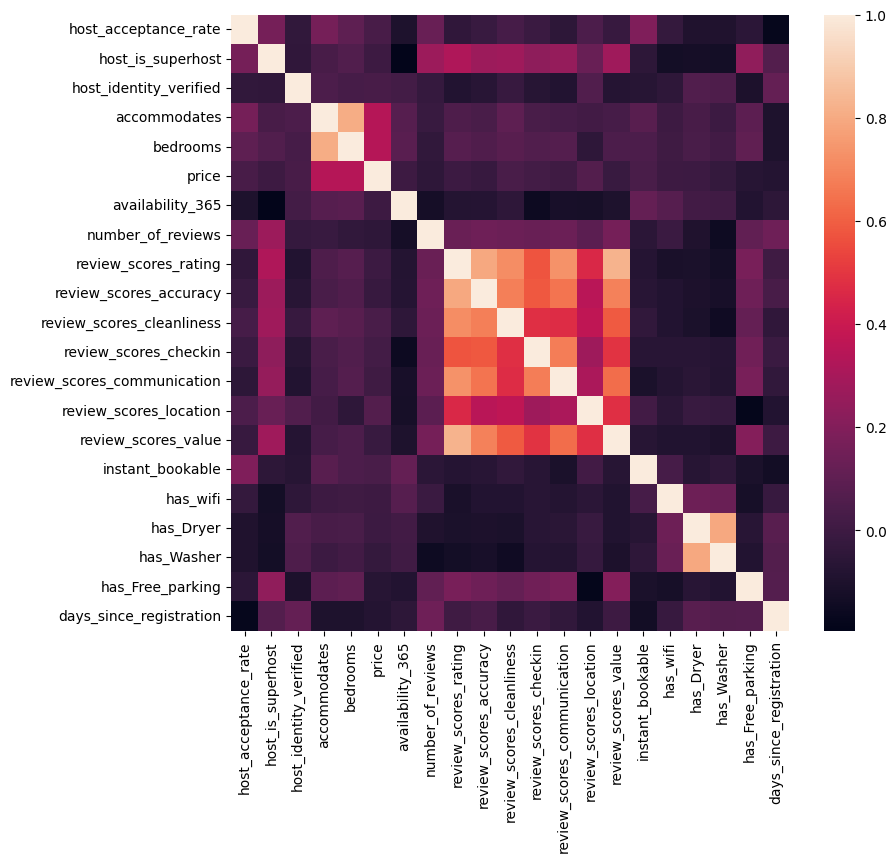

In [16]:
fig, ax = plt.subplots(figsize=(9,8))
fig=sns.heatmap(df1.corr())

In [17]:
fig=px.scatter_matrix(df1.drop(columns=['room_type','neighbourhood','has_wifi', 'has_Dryer', 'has_Washer', 'has_Free_parking','host_is_superhost',
       'host_identity_verified', 'instant_bookable']))
fig.update_layout(width=3000,height=3000)
fig.show()

In [18]:
df1.corr()

<ipython-input-18-49b3fcfeb4d1>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bedrooms,price,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,has_wifi,has_Dryer,has_Washer,has_Free_parking,days_since_registration
host_acceptance_rate,1.000000,0.160763,-0.039752,0.164321,0.097217,0.033023,-0.101025,0.126568,-0.043361,-0.015002,...,-0.011495,-0.050473,0.045746,-0.021010,0.189334,-0.028523,-0.092164,-0.094412,-0.056236,-0.177117
host_is_superhost,0.160763,1.000000,-0.041759,0.029545,0.061944,-0.001842,-0.194704,0.270833,0.320478,0.270906,...,0.233408,0.253167,0.125633,0.276968,-0.052119,-0.130266,-0.127093,-0.133970,0.234660,0.066461
host_identity_verified,-0.039752,-0.041759,1.000000,0.045492,0.028939,0.029957,0.019116,-0.024825,-0.083907,-0.064331,...,-0.070978,-0.084279,0.059218,-0.077665,-0.071463,-0.046834,0.059364,0.048802,-0.103163,0.114405
accommodates,0.164321,0.029545,0.045492,1.000000,0.804369,0.338025,0.072633,-0.014100,0.049959,0.034575,...,0.035446,0.025933,0.012696,0.027821,0.080502,-0.000821,0.031934,-0.005325,0.092277,-0.100611
bedrooms,0.097217,0.061944,0.028939,0.804369,1.000000,0.340731,0.082184,-0.038912,0.074287,0.056140,...,0.061862,0.067902,-0.047919,0.046578,0.046445,0.005248,0.036047,0.013873,0.100685,-0.100084
price,0.033023,-0.001842,0.029957,0.338025,0.340731,1.000000,-0.002476,-0.047424,-0.003579,-0.021750,...,0.017851,0.003518,0.062215,-0.015514,0.037891,0.000883,-0.004631,-0.026704,-0.072074,-0.082530
availability_365,-0.101025,-0.194704,0.019116,0.072633,0.082184,-0.002476,1.000000,-0.127306,-0.080189,-0.075196,...,-0.156086,-0.117532,-0.123102,-0.100300,0.114649,0.073225,0.011197,0.007016,-0.085384,-0.051047
number_of_reviews,0.126568,0.270833,-0.024825,-0.014100,-0.038912,-0.047424,-0.127306,1.000000,0.128131,0.143123,...,0.126042,0.134391,0.087617,0.163539,-0.059282,-0.008626,-0.095131,-0.150466,0.104045,0.141458
review_scores_rating,-0.043361,0.320478,-0.083907,0.049959,0.074287,-0.003579,-0.080189,0.128131,1.000000,0.790865,...,0.572962,0.732541,0.455905,0.823890,-0.076152,-0.113380,-0.108654,-0.130248,0.170266,0.003087
review_scores_accuracy,-0.015002,0.270906,-0.064331,0.034575,0.056140,-0.021750,-0.075196,0.143123,0.790865,1.000000,...,0.583340,0.650767,0.349149,0.682792,-0.065821,-0.086630,-0.101378,-0.118728,0.144098,0.030458


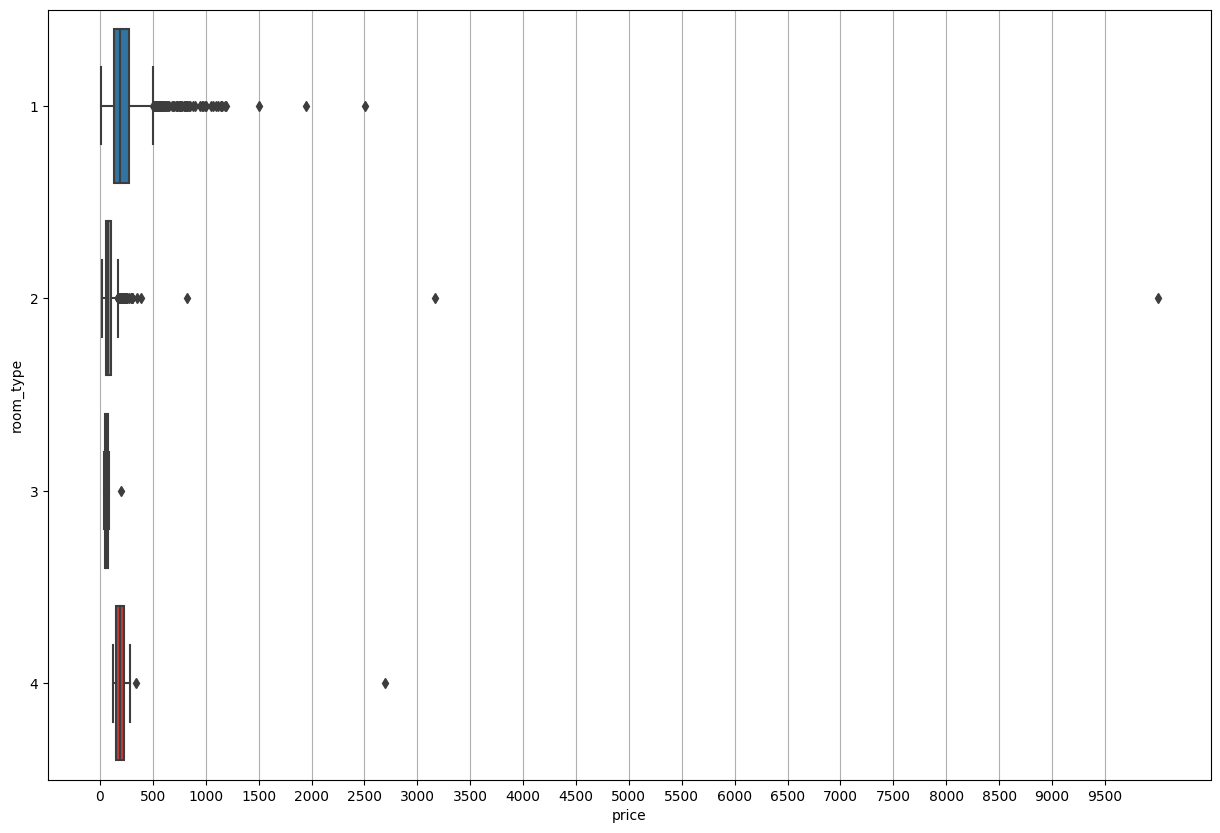

In [19]:
fig, ax = plt.subplots(1, figsize=(15,10))
ax.set_xticks(np.arange(0,10000,500))
ax.grid()
sns.boxplot(data=df1, x='price', y='room_type', ax=ax)
plt.show()

In [20]:
df1=df1.drop(columns=['accommodates','has_Dryer'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         2049 non-null   float64
 1   host_is_superhost            2049 non-null   int64  
 2   host_identity_verified       2049 non-null   int64  
 3   neighbourhood                2049 non-null   object 
 4   room_type                    2049 non-null   object 
 5   bedrooms                     2049 non-null   float64
 6   price                        2049 non-null   float64
 7   availability_365             2049 non-null   int64  
 8   number_of_reviews            2049 non-null   int64  
 9   review_scores_rating         2049 non-null   float64
 10  review_scores_accuracy       2049 non-null   float64
 11  review_scores_cleanliness    2049 non-null   float64
 12  review_scores_checkin        2049 non-null   float64
 13  review_scores_comm

In [24]:
info_df=pd.DataFrame()
info_df['Variable']=df1.drop(columns=['price']).columns
info_df['Variable type']=['quantitative','qualitative','qualitative','qualitative','qualitative','quantitative','quantitative',
'quantitative','quantitative','quantitative','quantitative','quantitative','quantitative','quantitative','quantitative','qualitative','qualitative',
'qualitative','qualitative','quantitative']
info_df['Data type']=df1.drop(columns=['price']).dtypes.values
info_df['number of unique values']=['',2,2,24,4,'','','','','','','','','','',2,2,2,2,'']

In [25]:
Counter(info_df['Variable type'])

Counter({'quantitative': 12, 'qualitative': 8})

In [26]:
info_df

,Variable,Variable type,Data type,number of unique values
0,host_acceptance_rate,quantitative,float64,
1,host_is_superhost,qualitative,int64,2
2,host_identity_verified,qualitative,int64,2
3,neighbourhood,qualitative,object,24
4,room_type,qualitative,object,4
5,bedrooms,quantitative,float64,
6,availability_365,quantitative,int64,
7,number_of_reviews,quantitative,int64,
8,review_scores_rating,quantitative,float64,
9,review_scores_accuracy,quantitative,float64,


In [27]:
df1=pd.get_dummies(df1)
df1.drop(columns=['neighbourhood_1','room_type_1'],inplace=True)

In [28]:
for c in df1.columns:
    if df1[c].dtype=='bool':
        df1[c]=df1[c].astype('object')
df1=df1.fillna(0)

From the results above we can see that variables 'bedrooms' correlates with 'accommodates' (which makes sence). We can see that judging by the correlation matrix, hight VIF and some pattern on the scatter plot. Therefore, we can drop the variable 'accommodates'.<br/>
Also variables 'has_Washer' and 'has_Dryer' are correlated (judging by VIF and correlation matrix), so we can use just 'has_Washer'.

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         2049 non-null   float64
 1   host_is_superhost            2049 non-null   int64  
 2   host_identity_verified       2049 non-null   int64  
 3   bedrooms                     2049 non-null   float64
 4   price                        2049 non-null   float64
 5   availability_365             2049 non-null   int64  
 6   number_of_reviews            2049 non-null   int64  
 7   review_scores_rating         2049 non-null   float64
 8   review_scores_accuracy       2049 non-null   float64
 9   review_scores_cleanliness    2049 non-null   float64
 10  review_scores_checkin        2049 non-null   float64
 11  review_scores_communication  2049 non-null   float64
 12  review_scores_location       2049 non-null   float64
 13  review_scores_valu

In [30]:

info_df

,Variable,Variable type,Data type,number of unique values
0,host_acceptance_rate,quantitative,float64,
1,host_is_superhost,qualitative,int64,2
2,host_identity_verified,qualitative,int64,2
3,neighbourhood,qualitative,object,24
4,room_type,qualitative,object,4
5,bedrooms,quantitative,float64,
6,availability_365,quantitative,int64,
7,number_of_reviews,quantitative,int64,
8,review_scores_rating,quantitative,float64,
9,review_scores_accuracy,quantitative,float64,


## Model

In [31]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

formula='price ~'
for c in df1.drop(columns='price').columns:
    formula+=' + '+ c

model = ols(formula, data=df1).fit()
model.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     8.724
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           3.33e-50
Time:                        14:49:20   Log-Likelihood:                -14336.
No. Observations:                2049   AIC:                         2.876e+04
Df Residuals:                    2004   BIC:                         2.902e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      32.7977    131.391      0.250      0.803    -224.880     290.475
host_acceptance_rate          -39.9728     33.515     -1.193      0.233    -105.701      25.756
host_is_superhost               3.3626     14.342      0.234      0.815     -24.764      31.489
host_identity_verified         -5.7595     18.040     -0.319      0.750     -41.139      29.620
bedrooms                       95.9578      6.819     14.071      0.000      82.584     109.332
availability_365               -0.1024      0.053     -1.916      0.056      -0.207       0.002
number_of_reviews              -0.1233      0.069     -1.792      0.073      -0.258       0.012
review_scores_rating          -37.9531     36.581     -1.037      0.300    -109.695      33.789
review_scores_accuracy        -41.5080     26.833     -1.547      0.122     -94.132      11.116
review_scores_cleanliness      33.5916     23.377      1.437      0.151     -12.254      79.437
review_scores_checkin          16.9385     24.414      0.694      0.488     -30.940      64.817
review_scores_communication     5.8254     26.804      0.217      0.828     -46.742      58.393
review_scores_location         35.2991     23.878      1.478      0.139     -11.529      82.127
review_scores_value             2.8024     24.555      0.114      0.909     -45.353      50.958
instant_bookable               -1.8468     14.650     -0.126      0.900     -30.577      26.884
has_wifi                       -4.9135     24.184     -0.203      0.839     -52.342      42.515
has_Washer                    -33.0421     12.708     -2.600      0.009     -57.965      -8.119
has_Free_parking              -18.6600     16.297     -1.145      0.252     -50.622      13.302
days_since_registration        -0.0035      0.006     -0.582      0.561      -0.015       0.008
neighbourhood_10               20.1768     41.655      0.484      0.628     -61.515     101.868
neighbourhood_11              116.1048     35.997      3.225      0.001      45.510     186.700
neighbourhood_12               77.9831     47.611      1.638      0.102     -15.389     171.355
neighbourhood_13               79.0920     43.386      1.823      0.068      -5.994     164.178
neighbourhood_14               -1.0591     47.370     -0.022      0.982     -93.958      91.840
neighbourhood_15               37.0633     28.921      1.282      0.200     -19.654      93.781
neighbourhood_16               -5.3943     43.785     -0.123      0.902     -91.264      80.475
neighbourhood_17               10.9525     55.935      0.196      0.845     -98.744     120.649
neighbourhood_18              106.5619     40.707      2.618      0.009      26.728     186.395
neighbourhood_19               59.9936     55.433      1.082      0.279     -48.718     168.705
neighbourho

From the model summary above we can see that if we take level of significance $\alpha=0.05$ then the variables neighbourhood, room_type, availability_365, has_Washer are significant. Other predictors have higher p-values than $\alpha$.

In [32]:
VIF = 1/(1-model.rsquared)
VIF

1.1915556821600395

In [33]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# no multicollinearity detected
y, X = dmatrices(formula, data=df1, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,494.549567,Intercept
1,1.203910,host_acceptance_rate
2,1.371889,host_is_superhost
3,1.129484,host_identity_verified
4,1.355327,bedrooms
5,1.196415,availability_365
6,1.242805,number_of_reviews
7,6.289571,review_scores_rating
8,3.196900,review_scores_accuracy
9,2.491427,review_scores_cleanliness


In [34]:
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
host_acceptance_rate,1.0,1.862509e+05,1.862509e+05,2.603963,1.067543e-01
host_is_superhost,1.0,8.964022e+03,8.964022e+03,0.125325,7.233661e-01
host_identity_verified,1.0,1.647183e+05,1.647183e+05,2.302917,1.292890e-01
bedrooms,1.0,1.962472e+07,1.962472e+07,274.372064,7.423841e-58
availability_365,1.0,2.197100e+05,2.197100e+05,3.071753,7.981643e-02
number_of_reviews,1.0,1.722021e+05,1.722021e+05,2.407548,1.209093e-01
review_scores_rating,1.0,7.222910e+04,7.222910e+04,1.009831,3.150647e-01
review_scores_accuracy,1.0,1.318771e+05,1.318771e+05,1.843766,1.746631e-01
review_scores_cleanliness,1.0,5.016725e+05,5.016725e+05,7.013855,8.151594e-03
review_scores_checkin,1.0,6.489755e+04,6.489755e+04,0.907329,3.409390e-01


In [35]:
reduced_formula='price ~'
drop_cols = ['price', 'has_Washer', 'has_wifi', 'has_Free_parking']
for c in df1.drop(columns=drop_cols).columns:
    reduced_formula+=' + '+ c
reduced_model = ols(reduced_formula, data=df1).fit()
aov_table = sm.stats.anova_lm(reduced_model, model)

aov_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2007.0,1.439178e+08,0.0,NaN,NaN,NaN
1,2004.0,1.433380e+08,3.0,579880.679561,2.702426,0.044129


In [36]:
reduced_formula='price ~'
drop_cols = ['price', 'host_identity_verified', 'host_acceptance_rate', 'host_is_superhost']
for c in df1.drop(columns=drop_cols).columns:
    reduced_formula+=' + '+ c
reduced_model = ols(reduced_formula, data=df1).fit()
aov_table = sm.stats.anova_lm(reduced_model, model)

aov_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2007.0,1.434453e+08,0.0,NaN,NaN,NaN
1,2004.0,1.433380e+08,3.0,107343.426256,0.500254,0.682138


In [37]:

reduced_formula='price ~'
select_cols = ['host_acceptance_rate', 'host_is_superhost', 'host_identity_verified','bedrooms', 'availability_365', 'number_of_reviews', 'review_scores_rating',
       'has_wifi', 'has_Washer', 'has_Free_parking','days_since_registration']
for c in df1[select_cols].columns:
    reduced_formula+=' + '+ c
reduced_model = ols(reduced_formula, data=df1).fit()
aov_table = sm.stats.anova_lm(reduced_model, model)

aov_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2037.0,1.478781e+08,0.0,NaN,NaN,NaN
1,2004.0,1.433380e+08,33.0,4.540144e+06,1.9235,0.001272


# Outliers

In [38]:
residuals = model.wresid
fitted_values = model.fittedvalues
influence = model.get_influence()
#obtain Cook's distance for each observation
cooks = influence.cooks_distance
standardized_residuals = influence.resid_studentized_internal

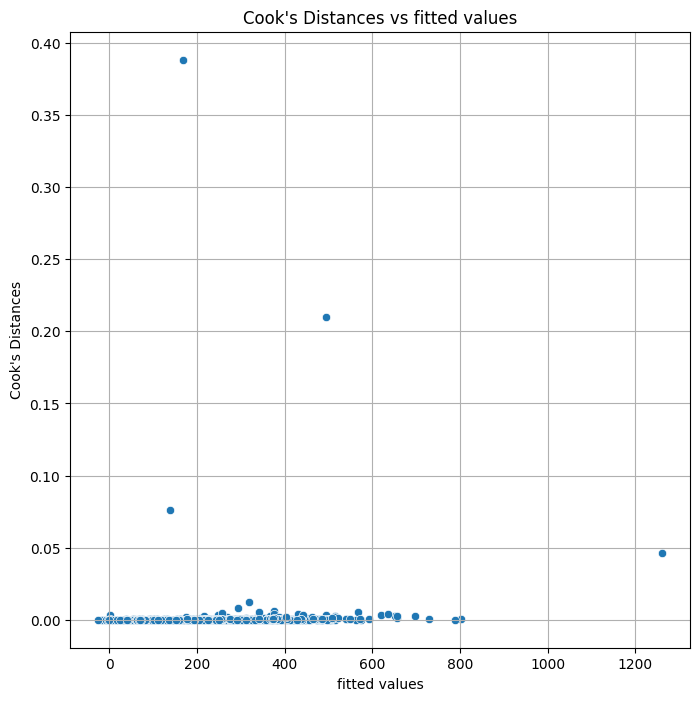

In [39]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax.grid()
plt.xlabel("fitted values")
plt.ylabel("Cook's Distances")
plt.title("Cook's Distances vs fitted values")
sns.scatterplot(x = fitted_values, y = cooks[0], ax=ax)
plt.show()

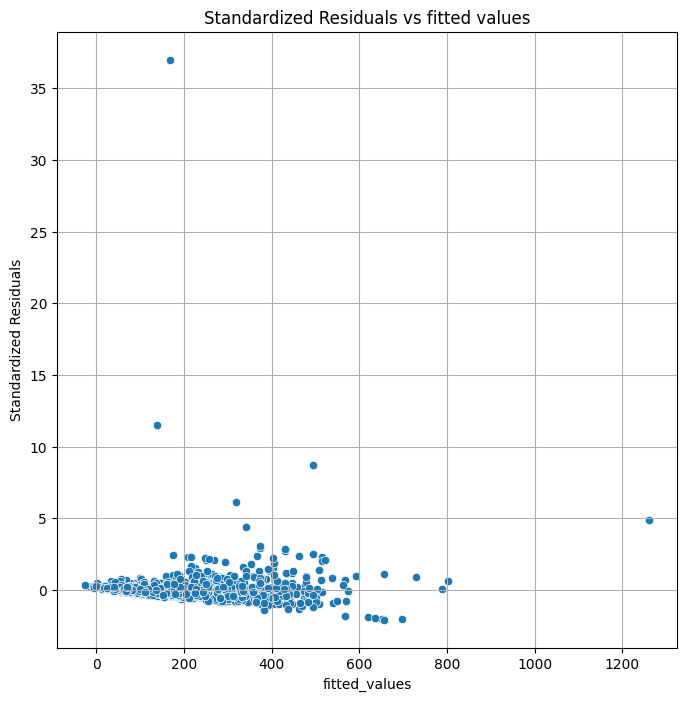

In [40]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax.grid()
plt.xlabel("fitted_values")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals vs fitted values")
sns.scatterplot(x = fitted_values, y = standardized_residuals, ax=ax)
plt.show()

In [41]:
outlier_stat = pd.concat([pd.Series(cooks[0], index=df1.index), pd.Series(standardized_residuals, index=df1.index)], axis = 1).rename(columns={0: "cooks_dist", 1: "standardized_resid"})
outlier_stat

,cooks_dist,standardized_resid
0,7.218499e-06,0.107180
1,1.888297e-07,0.026412
2,9.781778e-06,0.159163
3,5.746725e-04,1.114544
4,7.542368e-05,0.417081
...,...,...
2044,2.653084e-06,0.120250
2045,3.747631e-05,0.265483
2046,1.602834e-03,2.230069
2047,1.823477e-04,0.378258


In [42]:
cooks_dist_bound = 4/len(outlier_stat)
print(cooks_dist_bound)
outliers = outlier_stat[(outlier_stat["cooks_dist"]>cooks_dist_bound)|(outlier_stat["cooks_dist"]>1)|(np.abs(outlier_stat["standardized_resid"])>2)]
outliers

0.0019521717911176184


,cooks_dist,standardized_resid
84,0.003218,0.470708
391,0.003521,2.483753
585,0.006079,2.937800
590,0.001443,2.067503
632,0.210229,8.711238
638,0.046288,4.862570
748,0.388402,36.994656
793,0.011989,6.140927
807,0.001348,2.310405
826,0.076151,11.489355


In [43]:
len(outliers)

33

## Model after removing outliers

Let's see what happens after we remove outliers from the dataset

In [44]:
df_no_outliers = df1.drop(index=outliers.index)
df_no_outliers.shape

(2016, 45)

In [45]:
formula='price ~'
for c in df1.drop(columns='price').columns:
    formula+=' + '+ c

model_no_outliers = ols(formula, data=df_no_outliers).fit()
model_no_outliers.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     65.69
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:52:39   Log-Likelihood:                -11828.
No. Observations:                2016   AIC:                         2.375e+04
Df Residuals:                    1971   BIC:                         2.400e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    -133.0689     45.239     -2.941      0.003    -221.791     -44.347
host_acceptance_rate            5.8069     10.905      0.532      0.594     -15.580      27.194
host_is_superhost              14.0255      4.678      2.998      0.003       4.851      23.200
host_identity_verified        -11.2765      5.879     -1.918      0.055     -22.806       0.253
bedrooms                       86.8213      2.453     35.387      0.000      82.010      91.633
availability_365                0.0347      0.017      1.985      0.047       0.000       0.069
number_of_reviews              -0.0675      0.022     -3.024      0.003      -0.111      -0.024
review_scores_rating           33.1695     12.723      2.607      0.009       8.217      58.122
review_scores_accuracy          3.5997      9.745      0.369      0.712     -15.512      22.711
review_scores_cleanliness      13.4102      8.000      1.676      0.094      -2.279      29.099
review_scores_checkin           9.0945      8.635      1.053      0.292      -7.841      26.030
review_scores_communication   -25.9406      9.149     -2.835      0.005     -43.883      -7.998
review_scores_location         17.3081      7.917      2.186      0.029       1.782      32.834
review_scores_value           -17.3839      8.091     -2.149      0.032     -33.252      -1.516
instant_bookable               13.9846      4.783      2.924      0.003       4.604      23.365
has_wifi                      -16.4459      7.824     -2.102      0.036     -31.789      -1.102
has_Washer                    -10.2742      4.138     -2.483      0.013     -18.390      -2.159
has_Free_parking                8.5145      5.334      1.596      0.111      -1.947      18.976
days_since_registration         0.0008      0.002      0.404      0.687      -0.003       0.005
neighbourhood_10               17.7591     13.469      1.319      0.187      -8.656      44.174
neighbourhood_11               96.7727     11.737      8.245      0.000      73.754     119.792
neighbourhood_12               76.1467     15.690      4.853      0.000      45.375     106.918
neighbourhood_13               75.1314     14.031      5.355      0.000      47.614     102.649
neighbourhood_14              -15.1878     15.332     -0.991      0.322     -45.256      14.880
neighbourhood_15              -12.7482      9.395     -1.357      0.175     -31.174       5.677
neighbourhood_16              -13.5801     14.171     -0.958      0.338     -41.372      14.212
neighbourhood_17                3.8602     18.091      0.213      0.831     -31.620      39.340
neighbourhood_18               92.6043     13.308      6.959      0.000      66.505     118.703
neighbourhood_19               55.9974     18.398      3.044      0.002      19.916      92.079
neighbourho

Let's change the response variable to log(price)

In [46]:
df_no_outliers["log_price"] = np.log(df_no_outliers.price)
formula='log_price ~'
for c in df_no_outliers.drop(columns=['price', 'log_price']).columns:
    formula+=' + '+ c

model_no_outliers1 = ols(formula, data=df_no_outliers).fit()
model_no_outliers1.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     89.56
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:52:45   Log-Likelihood:                -1033.7
No. Observations:                2016   AIC:                             2157.
Df Residuals:                    1971   BIC:                             2410.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.3626      0.214     15.722      0.000       2.943       3.782
host_acceptance_rate            0.1634      0.052      3.168      0.002       0.062       0.264
host_is_superhost               0.0841      0.022      3.802      0.000       0.041       0.127
host_identity_verified         -0.0659      0.028     -2.370      0.018      -0.120      -0.011
bedrooms                        0.3255      0.012     28.063      0.000       0.303       0.348
availability_365             5.457e-05   8.26e-05      0.660      0.509      -0.000       0.000
number_of_reviews              -0.0002      0.000     -1.997      0.046      -0.000   -3.76e-06
review_scores_rating            0.1203      0.060      2.001      0.046       0.002       0.238
review_scores_accuracy          0.0265      0.046      0.576      0.565      -0.064       0.117
review_scores_cleanliness       0.1263      0.038      3.338      0.001       0.052       0.200
review_scores_checkin           0.0457      0.041      1.120      0.263      -0.034       0.126
review_scores_communication    -0.1018      0.043     -2.354      0.019      -0.187      -0.017
review_scores_location          0.1171      0.037      3.127      0.002       0.044       0.190
review_scores_value            -0.1287      0.038     -3.365      0.001      -0.204      -0.054
instant_bookable                0.1058      0.023      4.678      0.000       0.061       0.150
has_wifi                       -0.0574      0.037     -1.552      0.121      -0.130       0.015
has_Washer                     -0.0607      0.020     -3.101      0.002      -0.099      -0.022
has_Free_parking                0.0514      0.025      2.039      0.042       0.002       0.101
days_since_registration     -3.561e-06   9.25e-06     -0.385      0.700   -2.17e-05    1.46e-05
neighbourhood_10                0.0135      0.064      0.212      0.832      -0.111       0.138
neighbourhood_11                0.4288      0.055      7.728      0.000       0.320       0.538
neighbourhood_12                0.3960      0.074      5.338      0.000       0.250       0.541
neighbourhood_13                0.4213      0.066      6.351      0.000       0.291       0.551
neighbourhood_14               -0.0199      0.072     -0.275      0.783      -0.162       0.122
neighbourhood_15               -0.0676      0.044     -1.521      0.128      -0.155       0.020
neighbourhood_16               -0.0190      0.067     -0.283      0.777      -0.150       0.112
neighbourhood_17                0.0532      0.086      0.622      0.534      -0.115       0.221
neighbourhood_18                0.4900      0.063      7.788      0.000       0.367       0.613
neighbourhood_19                0.4085      0.087      4.696      0.000       0.238       0.579
neighbourho

## Testing subsets of coefficients

::Does the addition of predictors 'has_Washer', 'has_wifi', 'has_Free_parking' significantly contribute to the prediction of response variable log(price) after accounting for the contribution of all other predictors?

In [47]:
reduced_formula='log_price ~'
drop_cols = ['price', 'log_price', 'has_Washer', 'has_wifi', 'has_Free_parking']
for c in df_no_outliers.drop(columns=drop_cols).columns:
    reduced_formula+=' + '+ c
reduced_model = ols(reduced_formula, data=df_no_outliers).fit()
aov_table = sm.stats.anova_lm(reduced_model, model_no_outliers1)

aov_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1974.0,332.196649,0.0,NaN,NaN,NaN
1,1971.0,329.138875,3.0,3.057774,6.103676,0.000394


Does the addition of predictors 'host_identity_verified', 'host_acceptance_rate', 'host_is_superhost' significantly contribute to the prediction of response variable log(price) after accounting for the contribution of all other predictors?

In [48]:
reduced_formula='log_price ~'
drop_cols = ['price', 'log_price', 'host_identity_verified', 'host_acceptance_rate', 'host_is_superhost']
for c in df_no_outliers.drop(columns=drop_cols).columns:
    reduced_formula+=' + '+ c
reduced_model = ols(reduced_formula, data=df_no_outliers).fit()
aov_table = sm.stats.anova_lm(reduced_model, model_no_outliers1)

aov_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1974.0,335.076466,0.0,NaN,NaN,NaN
1,1971.0,329.138875,3.0,5.93759,11.85213,1.079569e-07


Does the addition of predictors 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location', 'review_scores_value' significantly contribute to the prediction of response variable log(price) after accounting for the contribution of all other predictors?

In [49]:
reduced_formula='log_price ~'
drop_cols = ['price', 'log_price', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']
for c in df_no_outliers.drop(columns=drop_cols).columns:
    reduced_formula+=' + '+ c
reduced_model = ols(reduced_formula, data=df_no_outliers).fit()
aov_table = sm.stats.anova_lm(reduced_model, model_no_outliers1)

aov_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1979.0,339.388264,0.0,NaN,NaN,NaN
1,1971.0,329.138875,8.0,10.249389,7.672121,3.664229e-10


Does the addition of predictor neighborhood significantly contribute to the prediction of response variable log(price) after accounting for the contribution of all other predictors?

In [50]:
reduced_formula='log_price ~'
drop_cols = ['price', 'log_price'] + [c for c in df_no_outliers.columns if 'neighbourhood' in c]
for c in df_no_outliers.drop(columns=drop_cols).columns:
    reduced_formula+=' + '+ c
reduced_model = ols(reduced_formula, data=df_no_outliers).fit()
aov_table = sm.stats.anova_lm(reduced_model, model_no_outliers1)

aov_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1994.0,379.200528,0.0,NaN,NaN,NaN
1,1971.0,329.138875,23.0,50.061653,13.034212,3.838663e-46


## Distribution of price vs log(price)

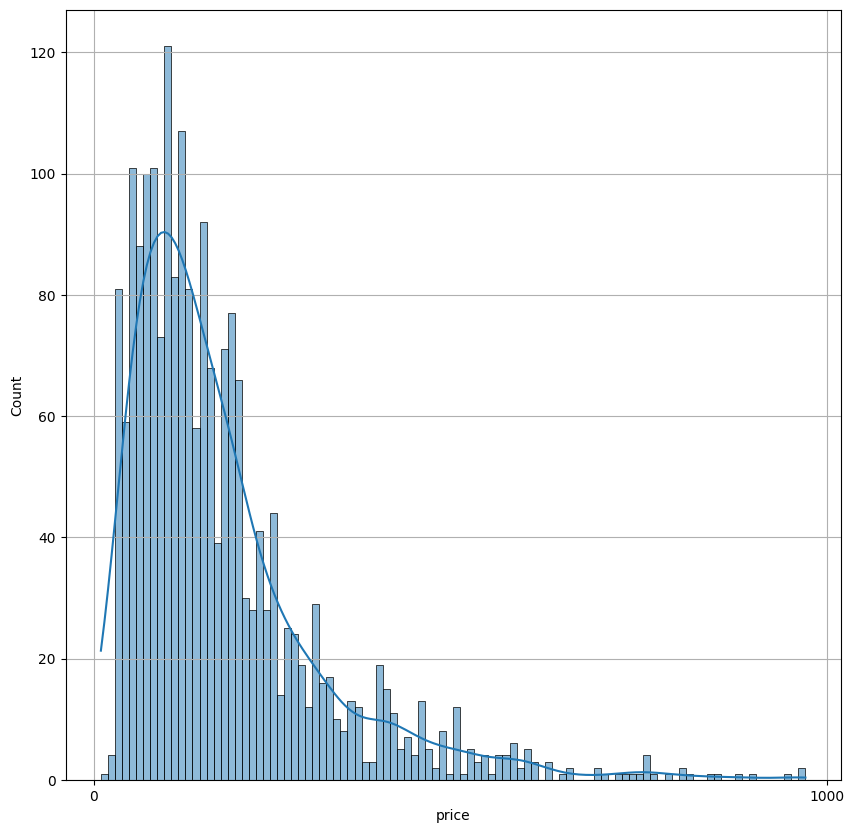

In [51]:
#sns.set_style("dark")
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xticks(np.arange(0,10000,1000))
ax.grid()
sns.histplot(df_no_outliers["price"], bins=100, kde=True)
plt.show()

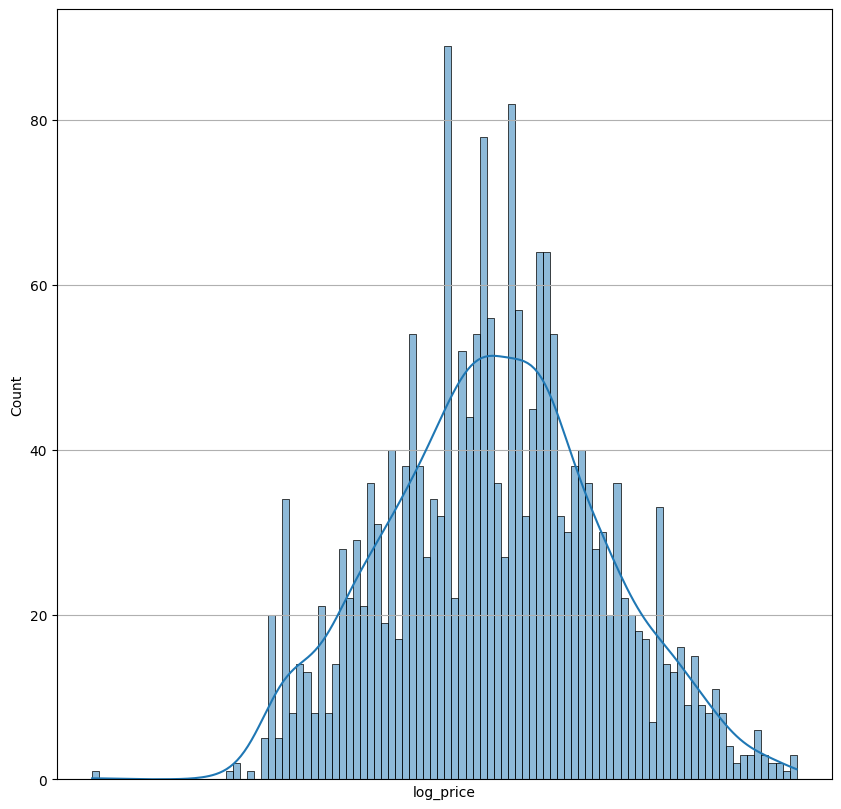

In [52]:
#sns.set_style("dark")
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xticks(np.arange(0,10000,1000))
ax.grid()
sns.histplot(df_no_outliers["log_price"], bins=100, kde=True)
plt.show()

## Residuals

In [53]:
#Residuals
residuals=model_no_outliers1.wresid
np.round(np.mean(residuals),10)

-0.0

In [54]:
st.t.interval(alpha=0.95, df=len(residuals)-1, loc=np.mean(residuals), scale=st.sem(residuals)) 

<ipython-input-54-e40c5aed1cba>:1: DeprecationWarning:

Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.



(-0.01765289096811397, 0.017652890967688302)

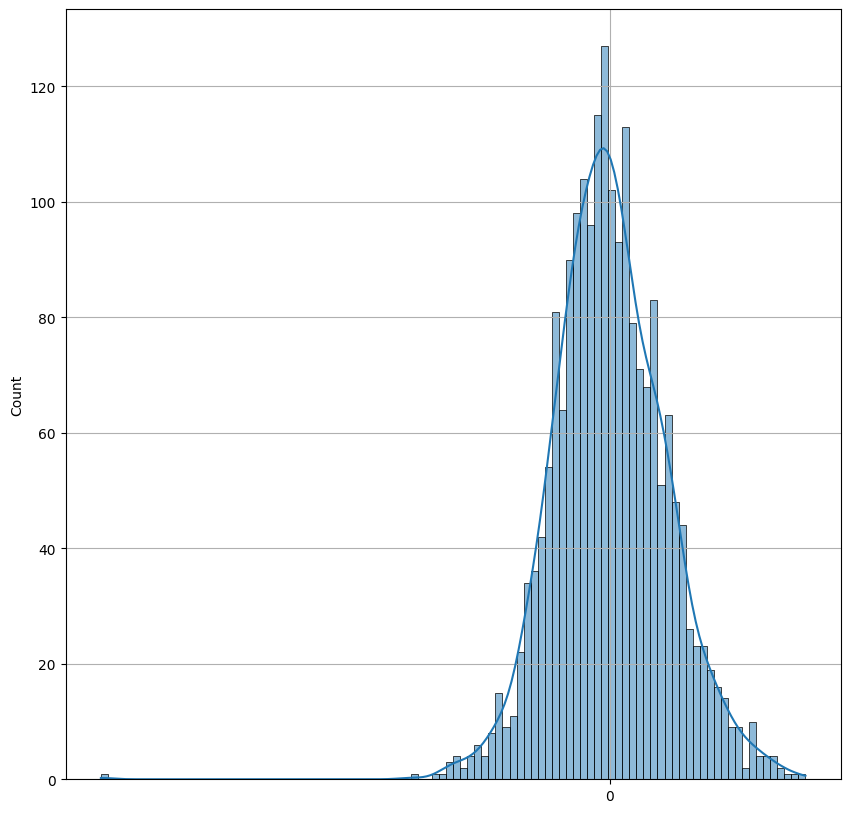

In [55]:
#sns.set_style("dark")
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xticks(np.arange(0,10000,1000))
ax.grid()
sns.histplot(residuals, bins=100, kde=True)
plt.show()

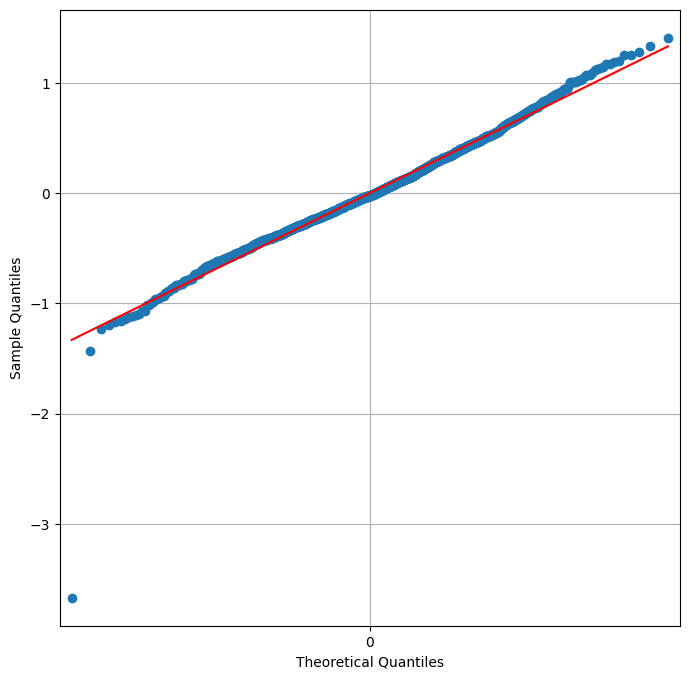

In [56]:
from statsmodels.graphics.gofplots import qqplot
# q-q plot
fig, ax = plt.subplots(1, figsize=(8,8))
ax.set_xticks(np.arange(0,10000,1000))
ax.grid()
qqplot(residuals, line='s', ax=ax)
plt.show()

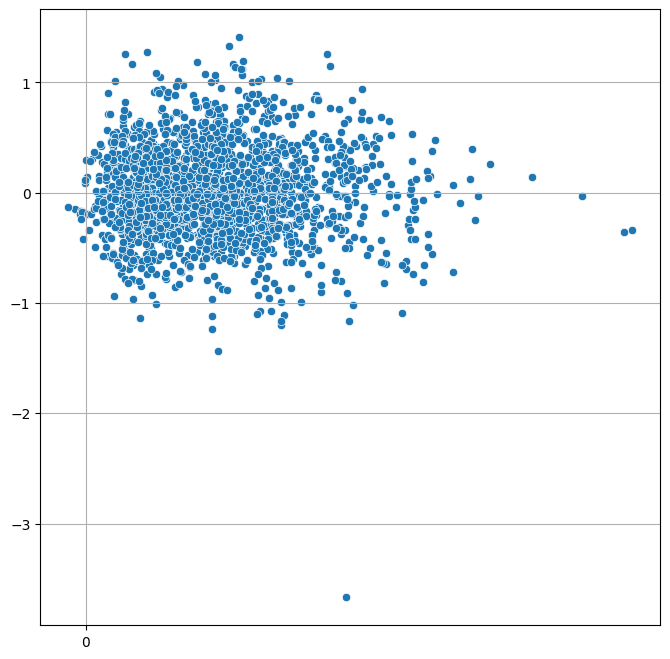

In [57]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax.set_xticks(np.arange(0,10000,1000))
ax.grid()
sns.scatterplot(x=model.fittedvalues, y=residuals, ax=ax)
plt.show()

## Training / Testing Model

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

X_train, X_test = train_test_split(df_no_outliers, test_size=0.20, random_state=42)

In [59]:
print('Training set size:',X_train.shape)
print('Testing set_size:',X_test.shape)

Training set size: (1612, 46)
Testing set_size: (404, 46)


In [60]:
formula='log_price ~'
for c in df_no_outliers.drop(columns=['price', 'log_price']).columns:
    formula+=' + '+ c

model1 = ols(formula, data=X_train).fit()
model1.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     73.22
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:53:26   Log-Likelihood:                -808.69
No. Observations:                1612   AIC:                             1707.
Df Residuals:                    1567   BIC:                             1950.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.3999      0.237     14.369      0.000       2.936       3.864
host_acceptance_rate            0.2093      0.058      3.606      0.000       0.095       0.323
host_is_superhost               0.0871      0.025      3.511      0.000       0.038       0.136
host_identity_verified         -0.0733      0.031     -2.365      0.018      -0.134      -0.013
bedrooms                        0.3269      0.013     25.203      0.000       0.301       0.352
availability_365             8.513e-05   9.21e-05      0.924      0.355   -9.55e-05       0.000
number_of_reviews              -0.0002      0.000     -1.884      0.060      -0.000    9.23e-06
review_scores_rating            0.0729      0.067      1.094      0.274      -0.058       0.204
review_scores_accuracy          0.0081      0.052      0.158      0.875      -0.093       0.109
review_scores_cleanliness       0.1404      0.042      3.371      0.001       0.059       0.222
review_scores_checkin           0.0112      0.049      0.231      0.817      -0.084       0.107
review_scores_communication    -0.0591      0.049     -1.199      0.231      -0.156       0.038
review_scores_location          0.0846      0.041      2.053      0.040       0.004       0.165
review_scores_value            -0.0806      0.045     -1.790      0.074      -0.169       0.008
instant_bookable                0.1111      0.025      4.438      0.000       0.062       0.160
has_wifi                       -0.0145      0.041     -0.350      0.726      -0.096       0.067
has_Washer                     -0.0575      0.022     -2.627      0.009      -0.100      -0.015
has_Free_parking                0.0369      0.028      1.323      0.186      -0.018       0.092
days_since_registration     -1.914e-07   1.03e-05     -0.019      0.985   -2.03e-05    1.99e-05
neighbourhood_10               -0.0292      0.071     -0.413      0.680      -0.168       0.109
neighbourhood_11                0.4215      0.061      6.921      0.000       0.302       0.541
neighbourhood_12                0.3845      0.080      4.803      0.000       0.227       0.542
neighbourhood_13                0.3761      0.075      5.045      0.000       0.230       0.522
neighbourhood_14               -0.0012      0.085     -0.014      0.989      -0.167       0.165
neighbourhood_15               -0.0737      0.050     -1.467      0.142      -0.172       0.025
neighbourhood_16                0.0201      0.074      0.270      0.787      -0.126       0.166
neighbourhood_17                0.0847      0.091      0.930      0.352      -0.094       0.263
neighbourhood_18                0.5175      0.071      7.282      0.000       0.378       0.657
neighbourhood_19                0.5430      0.112      4.851      0.000       0.323       0.763
neighbourho

We can see that Neighborhoods 6,18,19 (Back Bay, West End, Fenway) have higher price per night. Which makes sence since it matches the real data from the internet.

We can also see that the room type that we took as a base level (Entire home/apt) has the higher price per night when all other predictors are fixed. The cheapest room types are Shared room and Private room

In [69]:
dict_room_type

{'Entire home/apt': '1',
 'Private room': '2',
 'Shared room': '3',
 'Hotel room': '4'}

In [68]:
dict_neighbourhoods

{'East Boston': '1',
 'Roxbury': '2',
 'Jamaica Plain': '3',
 'Brighton': '4',
 'South Boston': '5',
 'Back Bay': '6',
 'Beacon Hill': '7',
 'Downtown': '8',
 'North End': '9',
 'Allston': '10',
 'South End': '11',
 'Bay Village': '12',
 'Charlestown': '13',
 'Hyde Park': '14',
 'Dorchester': '15',
 'Roslindale': '16',
 'West Roxbury': '17',
 'Fenway': '18',
 'West End': '19',
 'Mission Hill': '20',
 'South Boston Waterfront': '21',
 'Longwood Medical Area': '22',
 'Mattapan': '23',
 'Chinatown': '24',
 'Leather District': '25'}

In [61]:
alpha = .05
predictions1 = model1.get_prediction(X_test.drop(columns=['price', 'log_price'])).summary_frame(alpha)
predictions1

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.796141,0.052287,4.693582,4.898701,3.994557,5.597726
1,3.472054,0.138744,3.199910,3.744198,2.631767,4.312340
2,4.188135,0.068604,4.053571,4.322700,3.381831,4.994440
3,5.075460,0.068115,4.941855,5.209066,4.269315,5.881605
4,5.336434,0.106415,5.127703,5.545165,4.514492,6.158375
...,...,...,...,...,...,...
399,5.132882,0.055419,5.024180,5.241585,4.330488,5.935276
400,5.617611,0.069531,5.481227,5.753995,4.811001,6.424221
401,4.730897,0.067981,4.597553,4.864240,3.924795,5.536998
402,5.387571,0.052338,5.284911,5.490231,4.585974,6.189168


In [62]:
reduced_formula='price ~'
drop_cols = ['price', 'has_Washer', 'has_wifi', 'has_Free_parking','log_price']
for c in df_no_outliers.drop(columns=drop_cols).columns:
    reduced_formula+=' + '+ c
reduced_model = ols(reduced_formula, data=df1).fit()
aov_table = sm.stats.anova_lm(reduced_model, model1)

aov_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2007.0,1.439178e+08,0.0,NaN,NaN,NaN
1,1567.0,2.574139e+02,440.0,1.439176e+08,1.991124e+06,0.0


In [63]:
true_value = X_test.price
predicted_value = np.exp(model1.predict(X_test.drop(columns=['price', 'log_price'])))
print(f"Mean absolute error is {mean_absolute_error(true_value, predicted_value)}")
print(f"Mean squared error is {mean_squared_error(true_value, predicted_value)}") 
print(f"R2-score is {r2_score(true_value, predicted_value)}")
print(f"explained_variance_score is {explained_variance_score(true_value, predicted_value)}")

Mean absolute error is 58.87733746064461
Mean squared error is 9453.631873097407
R2-score is 0.4811595229510185
explained_variance_score is 0.49870591445206525


## Let's compare the performance to a Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=20)
regr_1.fit(X_train.drop(columns=['price', 'log_price']), X_train.price)

# Predict
predicted_value_dtr = regr_1.predict(X_test.drop(columns=['price', 'log_price']))

In [65]:
print(f"Mean absolute error is {mean_absolute_error(true_value, predicted_value_dtr)}")
print(f"Mean squared error is {mean_squared_error(true_value, predicted_value_dtr)}") 
print(f"R2-score is {r2_score(true_value, predicted_value_dtr)}")
print(f"explained_variance_score is {explained_variance_score(true_value, predicted_value_dtr)}")

Mean absolute error is 71.56648718443273
Mean squared error is 13289.231719496278
R2-score is 0.270651595332449
explained_variance_score is 0.27494033287879427
